# 1.Importing Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#2. Loading the dataset

In [4]:
#loading the dataset
df = pd.read_csv('diabetes_dataset.csv')

#Check first few rows
print(df.head())

   AGE Gender   FPG  HbA1c  Nocturia  Polyuria  Weight_loss  Vomiting  Nausea  \
0   52      F   7.0    6.7      True      True         True     False   False   
1   57      M  10.8    8.0     False     False        False     False   False   
2   56      F   3.6    5.0     False     False        False     False   False   
3   32      F   7.5    6.8     False     False        False     False   False   
4   51      M   5.7    6.2     False     False        False     False   False   

   Polydipsia  Polyphagia  Headache   BMI   Outcome  
0       False       False     False  31.0  positive  
1       False       False     False  32.0  positive  
2       False       False     False  23.0  negative  
3       False       False     False  31.0  positive  
4       False       False     False  20.0  negative  


#3. Checking and Handling the Missing Values


In [6]:
#Check for missing values
print(df.isnull().sum())
print("Missing Values in the dataset?")
print(df.isnull().values.any())

#Replacing the missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)

#Checking first few rows
print(df.head())


AGE            0
Gender         0
FPG            0
HbA1c          0
Nocturia       0
Polyuria       0
Weight_loss    0
Vomiting       0
Nausea         0
Polydipsia     0
Polyphagia     0
Headache       0
BMI            0
Outcome        0
dtype: int64
Missing Values in the dataset?
False
   AGE Gender   FPG  HbA1c  Nocturia  Polyuria  Weight_loss  Vomiting  Nausea  \
0   52      F   7.0    6.7      True      True         True     False   False   
1   57      M  10.8    8.0     False     False        False     False   False   
2   56      F   3.6    5.0     False     False        False     False   False   
3   32      F   7.5    6.8     False     False        False     False   False   
4   51      M   5.7    6.2     False     False        False     False   False   

   Polydipsia  Polyphagia  Headache   BMI   Outcome  
0       False       False     False  31.0  positive  
1       False       False     False  32.0  positive  
2       False       False     False  23.0  negative  
3       F

<ipython-input-6-6d0c4442adc2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI'].fillna(df['BMI'].mean(), inplace=True)


#3. Label Encoding

In [7]:
#Check for non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(non_numeric_columns)

#Label encoding the Gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

Index(['Gender', 'Outcome'], dtype='object')


#4. Splitting data into features and target

In [8]:
#Define features (x) and target (y)
x = df.drop('Outcome', axis=1)
y = df['Outcome']

#5. Splitting data into training and testing sets

In [9]:
# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#printing the data shape
print("Training Data Shape:", x_train.shape, y_train.shape)
print("Testing Data Shape:", x_test.shape, y_test.shape)

Training Data Shape: (2732, 13) (2732,)
Testing Data Shape: (683, 13) (683,)


#6. Data Scaling

In [10]:
#Standardizing the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

#7. Training the Model
- Using Decision Tree
- Using Logistic Regression
- Using Gradient Boosting

Logistic Regression Accuracy: 0.9941434846266471
Logistic Regression Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.98      0.99       226
    positive       0.99      1.00      1.00       457

    accuracy                           0.99       683
   macro avg       1.00      0.99      0.99       683
weighted avg       0.99      0.99      0.99       683



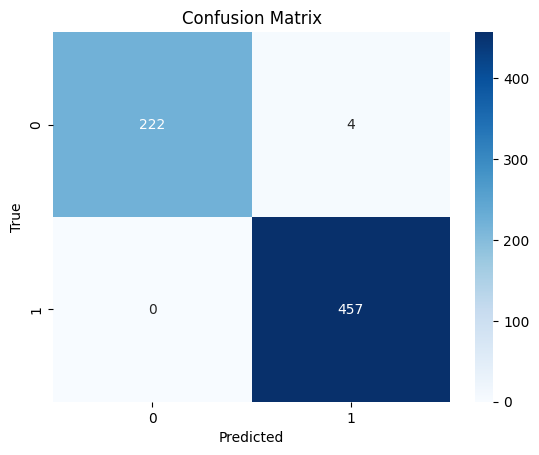

Decision Tree Accuracy: 0.9882869692532943
Decision Tree Classification Report:
               precision    recall  f1-score   support

    negative       0.99      0.97      0.98       226
    positive       0.99      1.00      0.99       457

    accuracy                           0.99       683
   macro avg       0.99      0.98      0.99       683
weighted avg       0.99      0.99      0.99       683



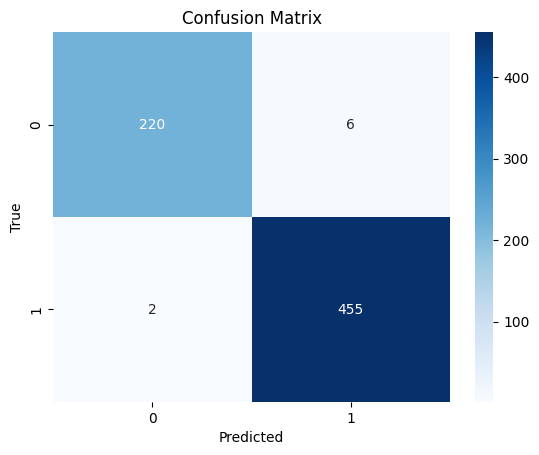

Gradient Boosting Accuracy: 0.9941434846266471
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.98      0.99       226
    positive       0.99      1.00      1.00       457

    accuracy                           0.99       683
   macro avg       1.00      0.99      0.99       683
weighted avg       0.99      0.99      0.99       683



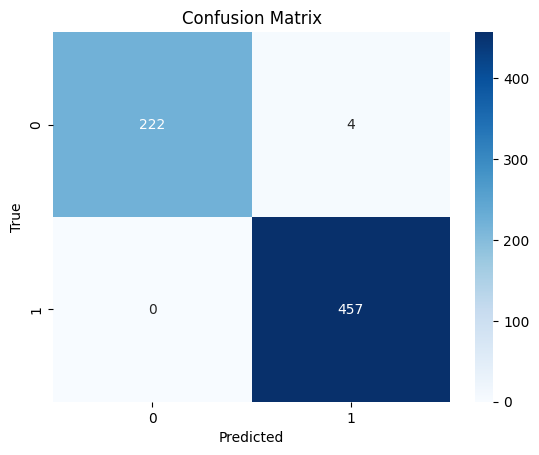

In [13]:
#Logistic Regression
# Train Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train_scaled, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(x_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

# Predict on test data
y_pred_dt = dt.predict(x_test)

# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Train Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train, y_train)

# Predict on test data
y_pred_gb = gb.predict(x_test)

# Evaluate Gradient Boosting
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Report:** Decision Tree, Random Forest and Gradient Boosting have similar results